In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import SparsePCA
from sklearn import random_projection

from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV as gridsearchcv

from scipy.stats import multivariate_normal
import os
import time

# Included following due to internet certificate problems
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/horses2')
# os.chdir('/Users/paullivesey/Dropbox/2. Personal/3. Projects/Python/unsupervised')
os.chdir('/home/poblivsig/Dropbox/Unsupervised_Learning')

print(os.getcwd())

/home/poblivsig/Dropbox/Unsupervised_Learning


In [3]:
## Open the pre-processed csv
df = pd.read_csv('data/glass.csv')
# df = pd.read_csv('data/phishing.csv')

In [4]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)


Shape

(214, 10)
Columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object
Description

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3

In [5]:
y = df['Type']
X = df.drop('Type', axis=1)
print(df.shape)

(214, 10)


In [6]:
N_CLUSTERS = 10
GM_N_CLUSTERS = 10
INIT = 'k-means++'
N_INIT = 10
KM_MAX_ITERS = 300
TOLERANCE = 1e-4
PC_DISTANCES = True
KM_VERBOSE = 0
KM_RANDOM_STATE = 42
ALGORITHM = 'full'
FEATURE_1_TO_PLOT = 3
FEATURE_2_TO_PLOT = 4
N_COMPONENTS = 9

In [7]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [8]:
# Scale the features (attributes)
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [9]:
# Visualization of the raw data
sns.set_context('notebook')
plt.style.use('bmh')


In [10]:
N_CLUSTERS = 10
silhouettes = []
inertias = []

## Loop through the cluster numbers and output silhouette
## and elbow charts

for n_cluster in range(2, N_CLUSTERS+1):
    km = KMeans(n_clusters=n_cluster,
                init=INIT,
                n_init=N_INIT,
                max_iter=KM_MAX_ITERS,
                tol=TOLERANCE,
                precompute_distances=PC_DISTANCES,
                verbose=KM_VERBOSE,
                random_state=KM_RANDOM_STATE,
                algorithm=ALGORITHM)

    y_pred = km.fit_predict(X)

    ### Print some stats
    print(f'inertia = {km.inertia_}')
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, km.labels_, metric='euclidean'))
    # print(f'silhouette score = {s_score:.3f}')

print(f'silhouettes = {silhouettes}')


/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  wa

inertia = 1738.9576211014876
inertia = 1411.815107212584
inertia = 1121.9030052218177
inertia = 918.4431149175704
inertia = 802.5219186219716
inertia = 696.9352001169066
inertia = 610.6945134909045
inertia = 574.070684344344
inertia = 531.7718654333289
silhouettes = [0.35497052851882066, 0.37753799231574864, 0.41816972830415133, 0.38081432424783906, 0.3169287109354253, 0.33752457796632107, 0.35478742242706957, 0.33144868102382175, 0.3020307756642061]


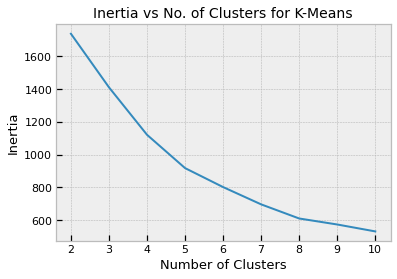

In [11]:
# Plot the inertias
plt.title('Inertia vs No. of Clusters for K-Means', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
sns.lineplot(x=np.arange(2 ,N_CLUSTERS+1), y=inertias)

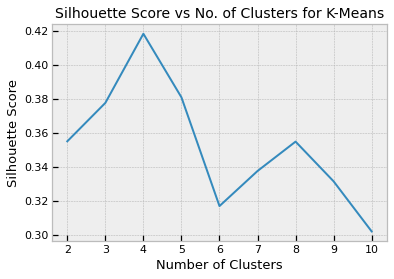

In [12]:
plt.title('Silhouette Score vs No. of Clusters for K-Means', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
sns.lineplot(x=np.arange(2 ,N_CLUSTERS+1), y=silhouettes)

In [13]:
def kmeans(Xk, xlim, ylim, data_title):
    print(len(np.arange(2, N_CLUSTERS+1)))
    print(len(silhouettes))

    #%
    #****** Run the KMeans and create Silhouette and scatter ******
    clusters = np.arange(2, N_CLUSTERS+1)
    silhouette_scores = {}

    ## Borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    for cluster in clusters:
        ## Build the plots
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ## The plot on x for the silhouette coeffients ranges from -1 to +1
        ax1.set_xlim([-0.25, 1])
        ## The plot on y has to include all of the shapes with their values sorted
        ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
        fig.set_size_inches(16, 6)

        ## Now run the clustering algorithm itself
        km = KMeans(n_clusters=cluster,
                    init=INIT,
                    n_init=N_INIT,
                    max_iter=KM_MAX_ITERS,
                    tol=TOLERANCE,
                    precompute_distances=PC_DISTANCES,
                    verbose=KM_VERBOSE,
                    random_state=KM_RANDOM_STATE,
                    algorithm=ALGORITHM)

        # print(f'inertia for {cluster} clusters = {km.inertia_}')
        y_pred = km.fit_predict(Xk)
        cluster_lbls = km.labels_

        ## Get the silhoueete score which gives a basic silhouette_score
        ## for the run.  Store away from plotting later
        silhouette_average = silhouette_score(Xk, y_pred)
        silhouette_scores[cluster] = silhouette_average
        # What is the silhouette score for each instance?
        sample_silhouette_scores = silhouette_samples(Xk, y_pred)

        lower_y = 10
        for j in range(cluster):
            # Group together the silhouette coefficients for cluster i
            # and the sort them from largest to smallest
            j_cluster_coeffs = sample_silhouette_scores[y_pred == j]
            j_cluster_coeffs.sort()

            ## Get bottom of cluster shape for chart
            upper_y = lower_y + j_cluster_coeffs.shape[0]
            colour = cm.rainbow(float(j) / cluster)

            ## Draw the cluster shape
            ax1.fill_betweenx(np.arange(lower_y, upper_y),
                             0, j_cluster_coeffs,
                             facecolor=colour, edgecolor=colour, alpha=0.7)
            ax1.text(-0.05, lower_y + 0.5 *j_cluster_coeffs.shape[0], str(j))

            # Get the next clusters position
            lower_y = upper_y + 10

        ## Draw the average silhouette score line.
        ax1.axvline(x=silhouette_average, color="green", linestyle="--")

        ## Set the title and labels
        ax1.set_xlabel('Silhouette Coefficient', fontsize=11)
        ax1.set_ylabel('Cluster', fontsize=11)

        ax1.set_title(f'Silhouette Diagram for {cluster} Clusters', fontsize=14)

        ## Create 2D scatterplot for the clusters created above
        ax2.scatter( Xk[:, FEATURE_1_TO_PLOT],
                     Xk[:, FEATURE_2_TO_PLOT],
                     markerglass='o',
                     s=30,
                     lw=0,
                     alpha=0.5,
                     c=cm.rainbow(km.labels_.astype(float) / cluster),
                     edgecolor='k')
        ax2.scatter(km.cluster_centers_[:, 0],
                    km.cluster_centers_[:, 1],
                    marker='o',
                    c='white',
                    alpha=1,
                    s=180,
                    edgecolor='k')

        for i, c in enumerate(km.cluster_centers_):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        ax2.set_xlim([0, xlim])
        ax2.set_xlim([0, ylim])
        ax2.set_xlabel('1st Feature')
        ax2.set_ylabel('2nd Feature')
        ax2.set_title(f'{cluster} Cluster data scatterplot for 2 Features.', fontsize=14)

        plt.suptitle((f'{data_title} K-Means Clustering on Sample Data with {cluster} Clusters'),
                     fontsize=15)

    # print(f'silhouette scores = {silhouette_scores}')
    plt.show()
    print(f'silhouettes = {silhouettes}')

    plt.title(f'Silhouette Line-plot for {data_title}', fontsize=14)
    plt.xlabel('Clusters')
    plt.ylabel('Silhouette Score')
    plt.plot(np.arange(1, 10),silhouettes)
    plt.show()


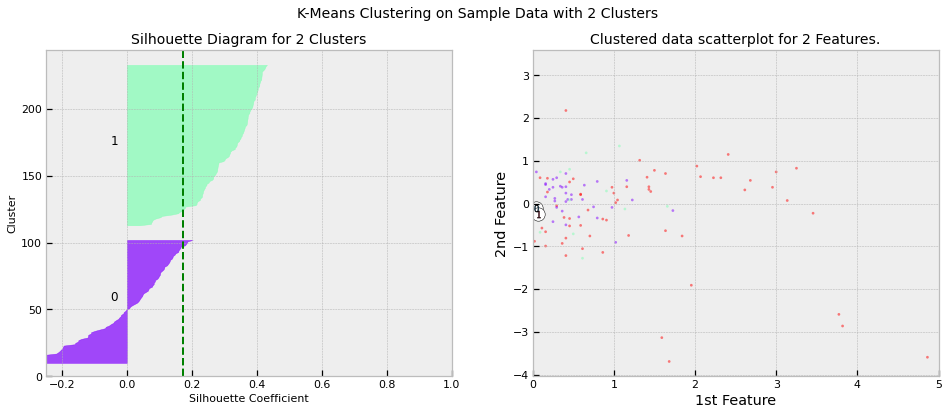

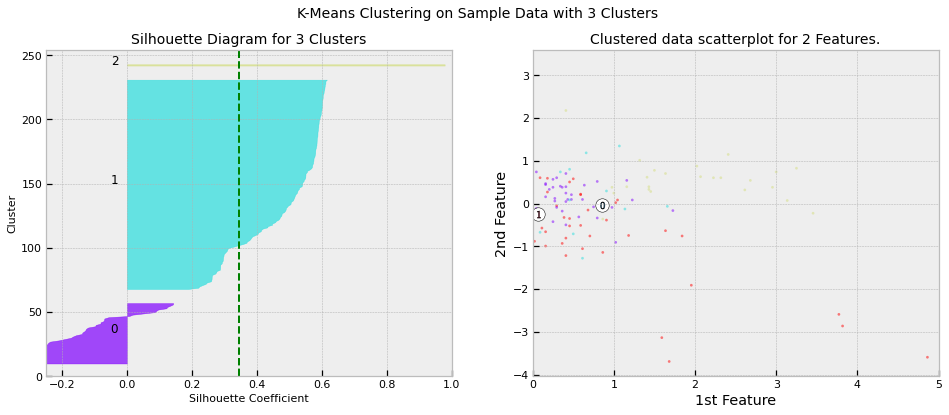

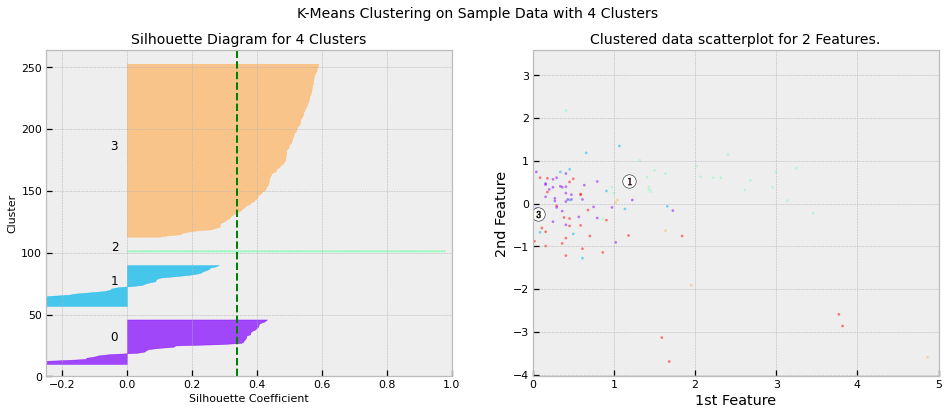

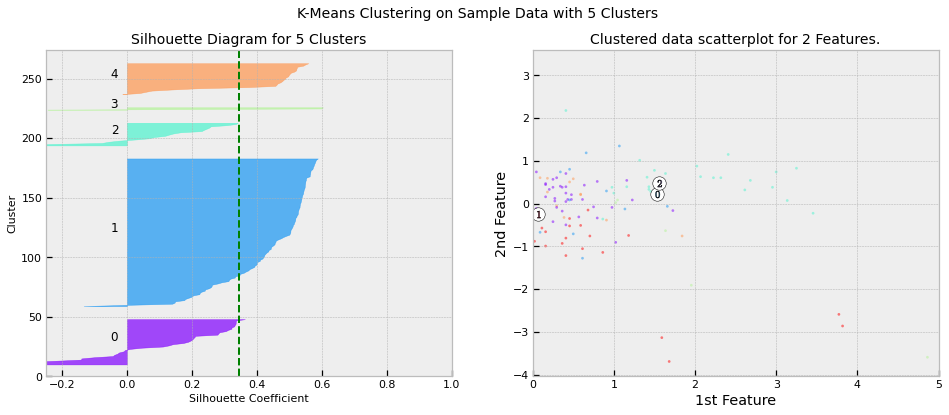

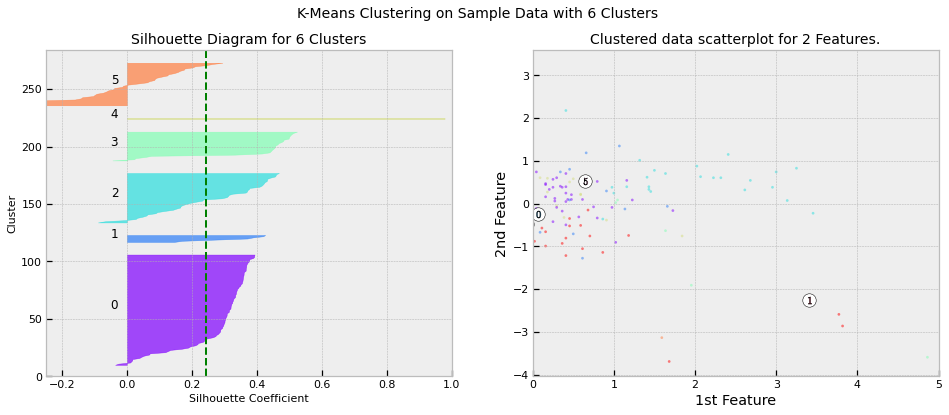

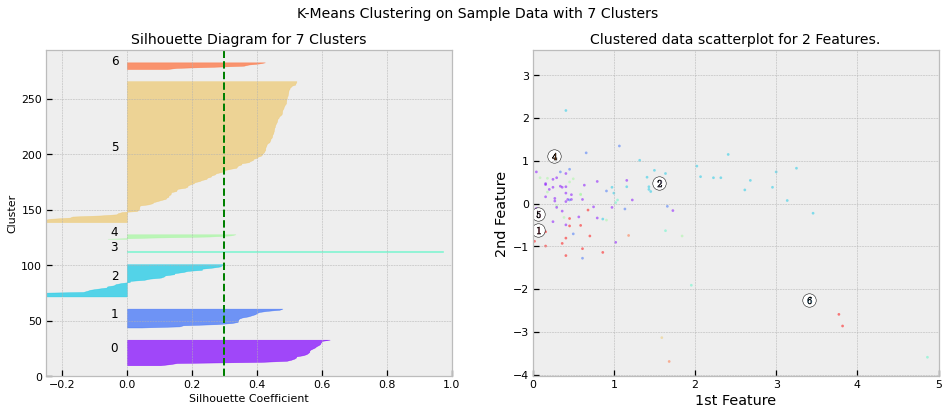

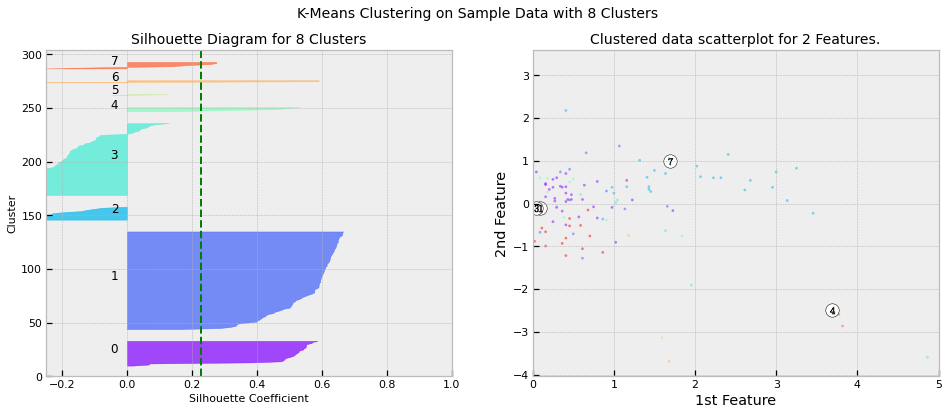

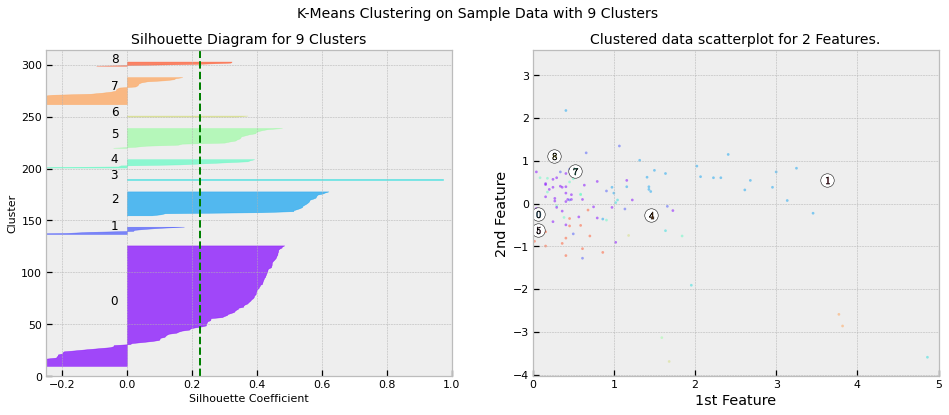

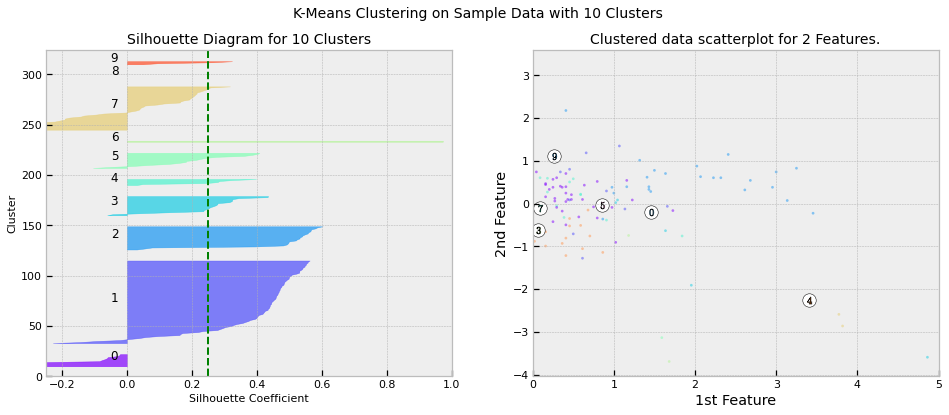

In [14]:
#g****** Run the GAUSSIAN MIXTURE and create Silhouette and scatter ******
clusters = np.arange(2, N_CLUSTERS+1)
silhouette_scores = {}
bics = []
aics = []

## Borrowed from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for cluster in clusters:
    ## Build the plots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ## The plot on x for the silhouette coeffients ranges from -1 to +1
    ax1.set_xlim([-0.25, 1])
    ## The plot on y has to include all of the shapes with their values sorted
    ax1.set_ylim([0, len(X) + (cluster + 1) * 10])
    fig.set_size_inches(16, 6)

    ## Now run the clustering algorithm itself
    gm = GaussianMixture(n_components=cluster )
    y_pred_gm = gm.fit_predict(X)
    bics.append(gm.bic(X))
    aics.append(gm.aic(X))
    # km = KMeans(n_clusters=cluster,
    #             init=INIT,
    #             n_init=N_INIT,
    #             max_iter=KM_MAX_ITERS,
    #             tol=TOLERANCE,
    #             precompute_distances=PC_DISTANCES,
    #             verbose=KM_VERBOSE,
    #             random_state=KM_RANDOM_STATE,
    #             algorithm=ALGORITHM)

    # y_pred = km.fit_predict(X)
    cluster_lbls = np.unique(y_pred_gm[:cluster]) #gm.labels_

    ## Get the silhouette score which gives a basic silhouette_score
    ## for the run.  Store away from plotting later
    silhouette_average = silhouette_score(X, y_pred_gm)
    silhouette_scores[cluster] = silhouette_average
    # What is the silhouette score for each instance?
    sample_silhouette_scores = silhouette_samples(X, y_pred_gm)

    lower_y = 10
    for j in range(cluster):
        # Group together the silhouette coefficients for cluster i
        # and the sort them from largest to smallest
        j_cluster_coeffs = sample_silhouette_scores[y_pred_gm == j]
        j_cluster_coeffs.sort()

        ## Get bottom of cluster shape for chart
        upper_y = lower_y + j_cluster_coeffs.shape[0]
        colour = cm.rainbow(float(j) / cluster)

        ## Draw the cluster shape
        ax1.fill_betweenx(np.arange(lower_y, upper_y),
                         0, j_cluster_coeffs,
                         facecolor=colour, edgecolor=colour, alpha=0.7)
        ax1.text(-0.05, lower_y + 0.5 *j_cluster_coeffs.shape[0], str(j))

        # Get the next clusters position
        lower_y = upper_y + 10

    ## Draw the average silhouette score line.
    ax1.axvline(x=silhouette_average, color="green", linestyle="--")

    ## Set the title and labels
    ax1.set_xlabel('Silhouette Coefficient', fontsize=11)
    ax1.set_ylabel('Cluster', fontsize=11)

    ax1.set_title(f'Silhouette Diagram for {cluster} Clusters', fontsize=14)

    ## Create 2D scatterplot for the clusters created above
    ax2.scatter( X[:, FEATURE_1_TO_PLOT],
                 X[:, FEATURE_2_TO_PLOT],
                 marker='.',
                 s=30,
                 lw=0,
                 alpha=0.5,
                 c=cm.rainbow(km.labels_.astype(float) / cluster),
                 edgecolor='k')
    ## Find centers for Gaussian clusters (choosing the points with
    ## the maximal density to represent its cluster.
    centers = np.empty(shape=(gm.n_components, X.shape[1]))
    for i in range(gm.n_components):
        density = multivariate_normal(cov=gm.covariances_[i],
                                      mean=gm.means_[i]).logpdf(X)
        centers[i, :] = X[np.argmax(density)]

    ax2.scatter(centers[:, 0],
                centers[:, 1],
                marker='o',
                c="white",
                alpha=1,
                s=180,
                edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0],
                    c[1],
                    marker='$%d$' % i,
                    alpha=1,
                    s=50,
                    edgecolor='k')
    ax2.set_xlim([0,5])
    ax2.set_xlabel("1st Feature")
    ax2.set_ylabel("2nd Feature")
    ax2.set_title("Clustered data scatterplot for 2 Features.", fontsize=14)

    plt.suptitle((f'K-Means Clustering on Sample Data with {cluster} Clusters'),
                 fontsize=14)

# print(f'silhouette scores = {silhouette_scores}')
plt.show()


In [15]:
bics = []
aics = []
clusters = np.arange(2, N_CLUSTERS+1)

for n_cluster in clusters:
    gm = GaussianMixture(n_components=n_cluster )
    y_clust_gm = gm.fit_predict(X)
    bics.append(gm.bic(X))
    aics.append(gm.aic(X))

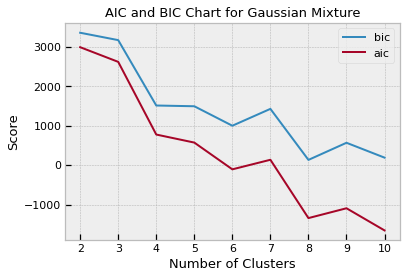

In [16]:
## Create AIC and BIC chart
plt.title('AIC and BIC Chart for Gaussian Mixture', fontsize=13)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.plot(clusters, bics, label='bic')
plt.plot(clusters, aics, label='aic')
plt.legend()
plt.show()

expl_variances = 
[0.38495875995308576, 0.5713394496615704, 0.7412616363029, 0.843530189200211, 0.9279332230094056, 0.9728143438630621, 0.9929541023050403, 0.9998390654765528]
dimensions = 
[1 2 3 4 5 6 7 8]


/home/poblivsig/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


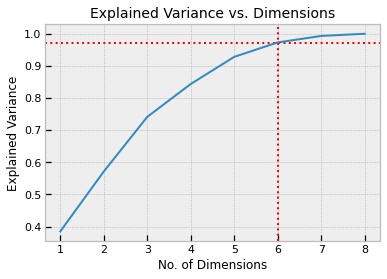

In [21]:
## Plot different dimensions against the explained variance
NO_DIMS_TO_CHECK = 9
dimensions = np.arange(1, NO_DIMS_TO_CHECK)
expl_variances = []

for dimension in dimensions:
    pca = PCA(n_components=dimension)
    pca.fit(X)
    expl_variances.append(np.sum(pca.explained_variance_ratio_))

print(f'expl_variances = \n{expl_variances}')
print(f'dimensions = \n{dimensions}')
plt.title('Explained Variance vs. Dimensions', fontsize=14)
plt.xlabel('No. of Dimensions', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.axvline(6, color='r', linestyle='dotted')
plt.axhline(0.97, color='r', linestyle='dotted')
sns.lineplot(dimensions, expl_variances)
plt.show()

In [22]:
def CA_Algorithm_2D(algorithm, KPCA, PCA_TYPE, title, components, **args):
    if KPCA:
        result = algorithm(n_components=components,
                           kernel=args['kernel'],
                           degree=args['degree'],
                           gamma=args['gamma'])
    else:
        result = algorithm(n_components=components) #, kernel='rbf', degree=4, gamma=0.4)

    X2dim = result.fit_transform(X)
    print(f'New dimensions = {X2dim.shape}')

    QUALITY_1 = 1
    QUALITY_2 = 3
    QUALITY_3 = 7

    qualities = [QUALITY_1,
                 QUALITY_2,
                 QUALITY_3]
    plt.figure()
    for col, j in zip (['r', 'c', 'y'], qualities):
        plt.scatter(X2dim[y == j, 0],
                    X2dim[y == j, 1],
                    alpha=0.4,
                    marker='.',
                    label=j,
                    color=col, #['r', 'c'],
                    lw=2,
                    s=40)
    plt.legend(title='Glass Type', loc='best')
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

    if PCA_TYPE:
        d = np.argmax(np.cumsum(result.explained_variance_ratio_) >=  0.95) + 1
        print(f'optimal PCA dimensions = {d}')

    ## Return the results to be used in other algorithms
    return X2dim

In [23]:
def CA_Algorithm_3D(algorithm, KPCA, title, components, **args):
    if KPCA:
        result = algorithm(n_components=components,
                           kernel=args['kernel'],
                           degree=args['degree'],
                           gamma=args['gamma'])
    else:
        result = algorithm(n_components=components) #, kernel='rbf', degree=4, gamma=0.4)

    ## ICA - Using 3 dimensions for visual analysis
    X3dim = result.fit_transform(X)
    print(f'New dimensions = {X3dim.shape}')

    QUALITY_1 = 1
    QUALITY_2 = 3
    QUALITY_3 = 7
    qualities = [QUALITY_1,
                 QUALITY_2,
                 QUALITY_3]
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection='3d')
    for col, j in zip (['r', 'c', 'y'], qualities):
        ax.scatter(X3dim[y == j, 0],
                   X3dim[y == j, 1],
                   X3dim[y == j, 2],
                   alpha=0.4,
                   marker='.',
                   label=j,
                   color=col,
                   lw=2,
                   s=60)
    plt.legend(title='Glass Type', loc='best')
    # plt.xlabel('X1', fontsize=12)
    # plt.ylabel('X2', fontsize=12)
    # plt.ylabel('other', fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

    ## Return the results to be used in other algorithms
    return X3dim

9
9


/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


AttributeError: 'PathCollection' object has no property 'markerglass'

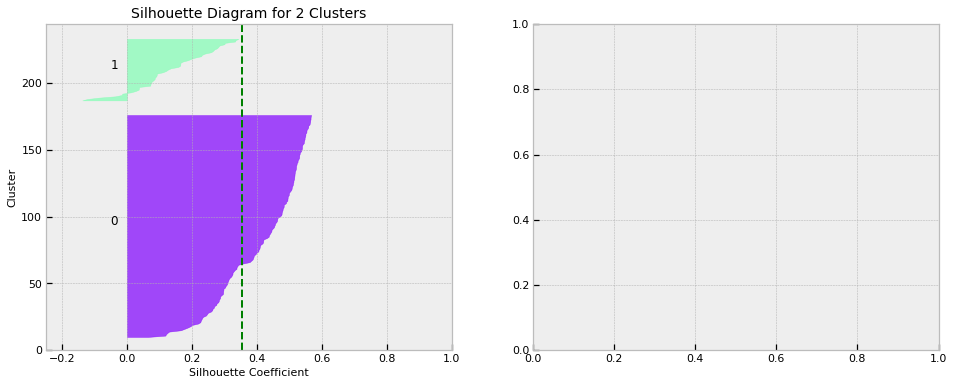

In [24]:
# Run KMeans with X
kmeans(X, 4, 4, 'Original Data')

New dimensions = (214, 9)
optimal PCA dimensions = 6
New dimensions = (214, 9)


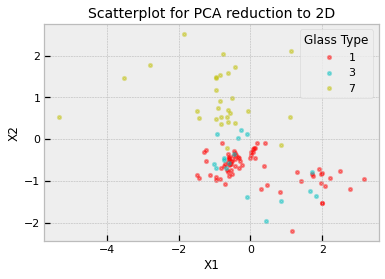

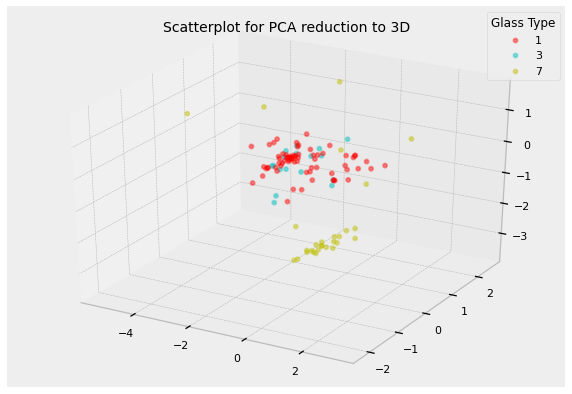

array([[ 0.81398176, -1.26379884,  0.71197912, ...,  0.0217458 ,
        -0.19731735,  0.01627355],
       [-1.11613197, -0.86564868,  0.05050125, ...,  0.00920277,
        -0.30747428, -0.01142323],
       [-1.48692251, -0.85169863, -0.2400707 , ..., -0.1073868 ,
        -0.12132538,  0.02224087],
       ...,
       [-0.0544619 ,  0.67585132, -2.76488918, ...,  1.62153911,
        -0.71128315,  0.04260088],
       [-0.82484366,  0.36789809, -3.04153951, ...,  0.95359951,
         0.24418875, -0.03127911],
       [-0.62944719,  0.69852989, -2.98208968, ...,  0.99334393,
         0.24434112, -0.02332869]])

In [25]:
# Build PCA Charts
Xpca = CA_Algorithm_2D(PCA,
                       False,
                       True,
                       'Scatterplot for PCA reduction to 2D',
                       components=N_COMPONENTS)

CA_Algorithm_3D(PCA,
                False,
                'Scatterplot for PCA reduction to 3D',
                components=N_COMPONENTS)

In [ ]:
## Run KMeans again with reduced dimension data
kmeans(Xpca, 2, 2, 'PCA Data')

New dimensions = (214, 9)
New dimensions = (214, 9)


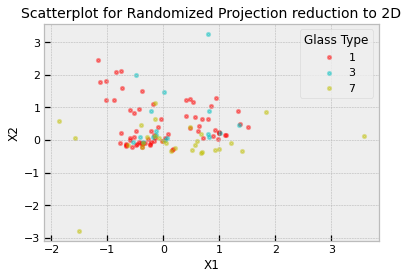

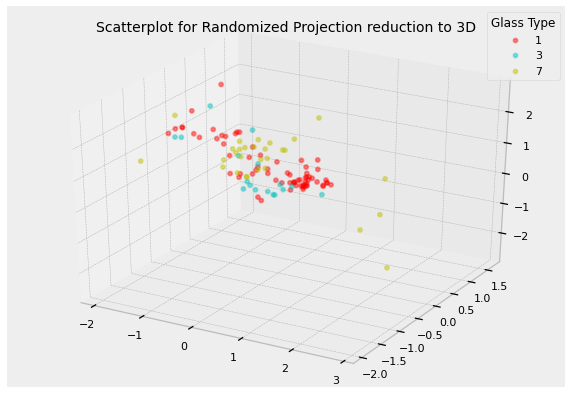

array([[-0.31405372, -0.23951905,  1.28693151, ...,  0.52761914,
         0.61477102, -0.12858645],
       [ 0.36353691, -0.15498454,  0.53825382, ...,  0.502616  ,
         0.00948015,  0.09432981],
       [ 0.60100705, -0.02184286,  0.16964295, ...,  0.42127806,
        -0.13268238,  0.08714804],
       ...,
       [ 0.08306371,  0.97118459,  1.50147234, ...,  1.6142795 ,
        -0.67385053, -1.30027884],
       [-0.38318394,  0.61939346,  0.56217591, ...,  1.22049689,
        -1.44984756, -1.16528159],
       [-0.28269511,  0.54928662,  0.63256446, ...,  1.02912119,
        -1.1761944 , -1.46586543]])

In [26]:
# Build Randomized Projection Charts
Xrp = CA_Algorithm_2D(random_projection.GaussianRandomProjection,
                      False,
                      False,
                      'Scatterplot for Randomized Projection reduction to 2D',
                      components=N_COMPONENTS)
CA_Algorithm_3D(random_projection.GaussianRandomProjection,
                False,
                'Scatterplot for Randomized Projection reduction to 3D',
                components=N_COMPONENTS)

In [ ]:
## Run KMeans again with reduced dimension data
kmeans(Xrp, 2.5, 4, 'Randomized Projection Data')

New dimensions = (214, 9)


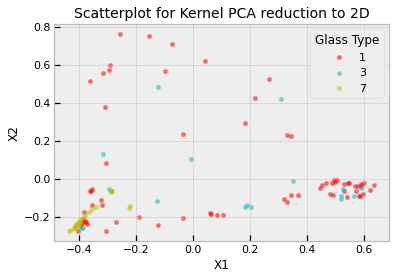

AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

In [27]:
# Build Kernel PCA Charts
Xkpca = CA_Algorithm_2D(KernelPCA,
                        True,
                        True,
                        'Scatterplot for Kernel PCA reduction to 2D',
                        components=N_COMPONENTS,
                        kernel='rbf',
                        degree=4,
                        gamma=0.4)
CA_Algorithm_3D(KernelPCA,
                True,
                'Scatterplot for Kernel PCA reduction to 3D',
                components=N_COMPONENTS,
                kernel='rbf',
                degree=4,
                gamma=0.4)

In [ ]:
## Run KMeans again with reduced dimension data
kmeans(Xkpca, 0.5, 0.5, 'Kernel PCA Data')

New dimensions = (214, 9)
New dimensions = (214, 9)


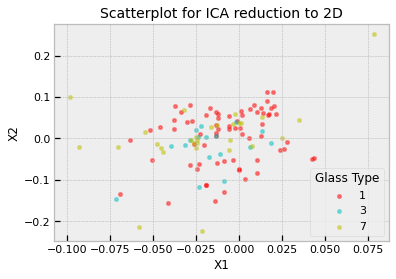

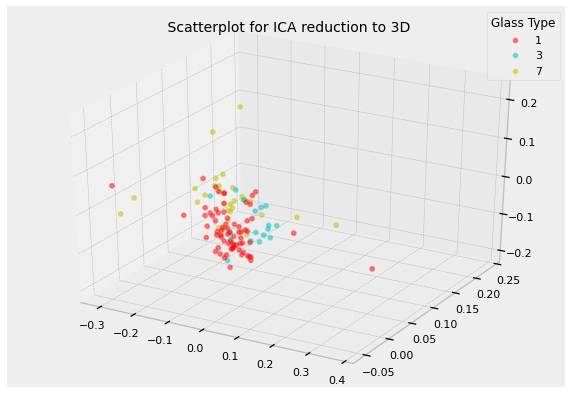

array([[-0.07558183, -0.05436519,  0.03771992, ...,  0.02616609,
        -0.02673732,  0.07278274],
       [-0.07191706, -0.00520508,  0.00749244, ...,  0.03367974,
        -0.06341167,  0.01141463],
       [-0.02695811, -0.02319291, -0.01911427, ...,  0.03021086,
        -0.0541738 , -0.02110478],
       ...,
       [-0.26222384, -0.05166441,  0.00440938, ..., -0.00585677,
        -0.00063577, -0.08587288],
       [ 0.0187238 , -0.04221636,  0.01106056, ...,  0.05164403,
        -0.00356453, -0.08038169],
       [ 0.0092515 , -0.04554439,  0.01307621, ...,  0.04788928,
         0.00888498, -0.08636474]])

In [28]:
# Build ICA Charts
Xica = CA_Algorithm_2D(FastICA,
                       False,
                       False,
                       'Scatterplot for ICA reduction to 2D',
                       components=N_COMPONENTS)

CA_Algorithm_3D(FastICA,
                False,
                ' Scatterplot for ICA reduction to 3D',
                components=N_COMPONENTS)

In [ ]:
## Run KMeans again with reduced dimension data
kmeans(Xica, 3, 0.1, 'ICA Data')

New dimensions = (214, 9)
New dimensions = (214, 9)


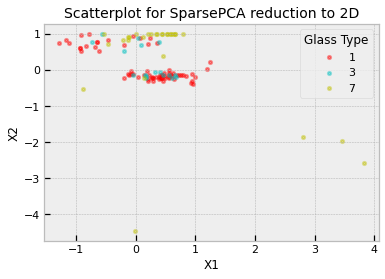

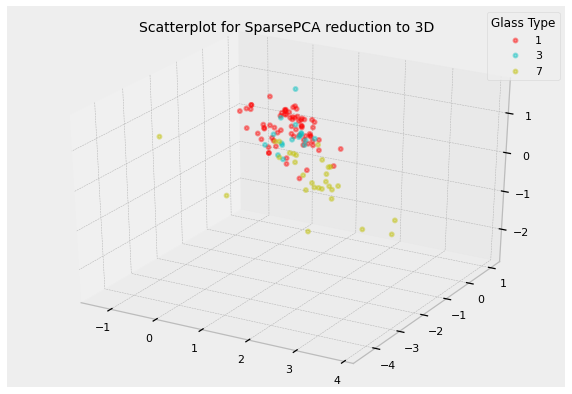

array([[ 0.2291323 ,  0.88764879, -0.25051883, ...,  1.22608788,
        -0.99369848,  0.        ],
       [ 1.19471893,  0.03464042, -0.52030057, ...,  0.66178563,
         0.28384863,  0.        ],
       [ 1.24836135,  0.21742793, -0.13181486, ...,  0.62545903,
         0.82116992,  0.        ],
       ...,
       [ 0.61994009,  1.00950713, -1.02749026, ..., -2.14127402,
        -0.85842878,  0.        ],
       [ 0.57341694,  1.00950713, -1.0490728 , ..., -2.12611283,
         0.6971727 ,  0.        ],
       [ 0.43127983,  1.00950713, -0.88720375, ..., -2.15335418,
         0.47172321,  0.        ]])

In [29]:
# Build SparsePCA Charts
Xspca = CA_Algorithm_2D(SparsePCA,
                        False,
                        False,
                        'Scatterplot for SparsePCA reduction to 2D',
                        components=N_COMPONENTS)

CA_Algorithm_3D(SparsePCA,
                False,
                'Scatterplot for SparsePCA reduction to 3D',
                components=N_COMPONENTS)

In [ ]:
## Run KMeans again with reduced dimension data
kmeans(Xspca, 2.5, 4, 'Sparse PCA Data')

Time for MLP with Original Data = 5.9585 seconds
Time for MLP with PCA Reduction = 4.5839 seconds
Time for MLP with ICA Reduction = 5.0712 seconds
Time for MLP with Randomized Projection Run = 4.2494 seconds
Time for MLP with Sparse PCA Reduction = 4.8886 seconds


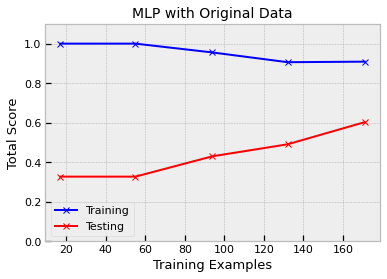

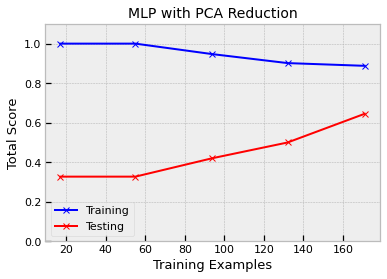

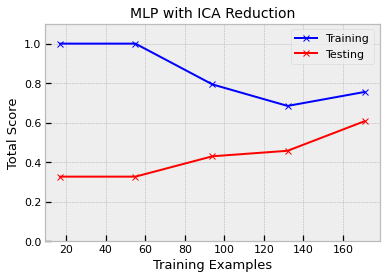

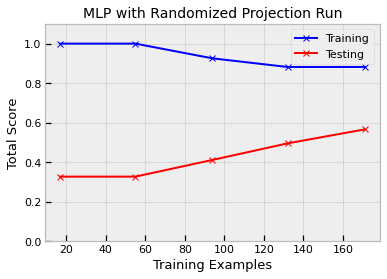

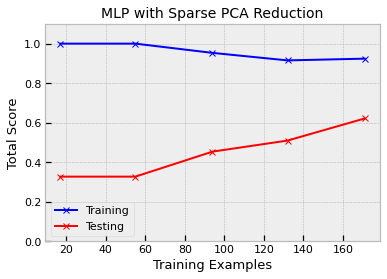

In [30]:
# Run the transformed feature from each of the 4 algorithms on the ANN
for Xx in [[X, 'MLP with Original Data'],
           [Xpca, 'MLP with PCA Reduction'],
           [Xica, 'MLP with ICA Reduction'],
           [Xrp, 'MLP with Randomized Projection Run'],
           [Xspca, 'MLP with Sparse PCA Reduction']]:
    tic = time.perf_counter()
    clf = mlp(hidden_layer_sizes=10,
              random_state=42,
              max_iter=10000)
    # clf.fit(X, y)
    train_szs = np.linspace(.1, 1.0, 5)
    train_szs, train_scr, test_scr = learning_curve(clf,
                                                    Xx[0],
                                                    y,
                                                    cv=5,
                                                    n_jobs=-1,
                                                    train_sizes=train_szs)
    toc = time.perf_counter()
    print(f'Time for {Xx[1]} = {toc-tic:0.4f} seconds')
    # run_mlp(clf, "Neural Net with PCA Transformed Data",
    #         X,
    #         y,
    #         ylim=[0, 1])
    plt.figure()
    plt.xlabel('Training Examples', fontsize=13)
    plt.ylabel('Total Score', fontsize=13)
    plt.title(Xx[1], fontsize=14)
    ylim=[0, 1.1]
    if ylim is not None:
        plt.ylim(*ylim)

    train_scr_std = np.std(train_scr, axis=1)
    train_scr_mn = np.mean(train_scr, axis=1)

    test_scr_std = np.std(test_scr, axis=1)
    test_scr_mn = np.mean(test_scr, axis=1)

    plt.plot(train_szs,
             train_scr_mn,
             'x-',
             # alpha=0.1,
             color='b')
    plt.plot(train_szs,
             test_scr_mn,
             'x-',
             # alpha=0.1,
             color='r')
    plt.legend(['Training', 'Testing'], loc='best')
    plt.show()
